In [9]:
import wandb
import numpy as np

# Initialize the API
api = wandb.Api()

# Fetch the project (replace 'your_username/your_project_name' with the actual project name)
project = api.project('jzapanag/PRPD-GAN')

# Initialize the sum
total_gpu_power_usage = 0
training_time = 0
key = 'system.gpu.0.powerWatts'

# Iterate over all runs in the project
for run in api.runs('jzapanag/PRPD-GAN'):
    # Iterate through the system metrics history
    #system_gpu_power = []
    system_metrics = run.history(stream='events')#stream='systemMetrics'
    if key in system_metrics:
        data = system_metrics['system.gpu.0.powerWatts'].dropna().values
        avg_power = data.mean()
        total_runtime = system_metrics['_runtime'].dropna().values[-1]
        total_gpu_power_usage += avg_power*(total_runtime/3600)
        #print(avg_power*(total_runtime/3600))
        training_time += total_runtime

print(f"Total GPU power usage: {total_gpu_power_usage} W.")
print(f"Total training time: {training_time/3600} h.")

Total GPU power usage: 5688.680119407756 W.
Total training time: 241.338918586078 h.


In [6]:
system_metrics

,system.gpu.0.powerPercent,system.gpu.0.smClock,system.disk./.usageGB,system.gpu.0.powerWatts,_wandb,system.disk.out,system.gpu.0.temp,system.gpu.0.memory,system.memory_percent,system.gpu.0.gpu,...,system.cpu.12.cpu_percent,system.cpu.2.cpu_percent,system.cpu.5.cpu_percent,system.cpu,system.proc.cpu.threads,system.cpu.0.cpu_percent,system.cpu.13.cpu_percent,system.cpu.10.cpu_percent,system.cpu.8.cpu_percent,system.cpu.14.cpu_percent
0,10.053846,300.0,899.813049,6.535,True,0.0,71.0,0.0,62.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,59.724349,63.819876,55.417957,52.677128,116.0,60.447761,63.931889,76.425270,67.846154,68.153846
3,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,80.428135,86.666667,80.834621,52.721789,116.0,76.737160,85.802469,89.043210,82.388974,89.180835
4,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,54.977029,68.535826,43.302181,52.830032,116.0,52.702703,56.568779,68.518519,54.179567,61.205564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,76.344086,83.906250,75.696594,53.318450,116.0,73.959938,76.899225,85.179407,76.516330,86.760125
318,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,68.702290,75.348837,70.982839,53.318316,116.0,71.216617,65.284178,77.828746,73.773006,75.460123
319,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,NaN,NaN,901.645168,NaN,True,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
system_metrics.columns

Index(['system.gpu.0.powerPercent', 'system.gpu.0.smClock',
       'system.disk./.usageGB', 'system.gpu.0.powerWatts', '_wandb',
       'system.disk.out', 'system.gpu.0.temp', 'system.gpu.0.memory',
       'system.memory_percent', 'system.gpu.0.gpu', '_runtime',
       'system.proc.memory.rssMB', 'system.gpu.0.memoryAllocatedBytes',
       'system.proc.memory.availableMB', 'system.proc.memory.percent',
       'system.disk./.usagePercent', 'system.disk.in',
       'system.gpu.0.memoryAllocated', '_timestamp',
       'system.gpu.0.memoryClock', 'system.gpu.0.enforcedPowerLimitWatts',
       'system.network.sent', 'system.network.recv',
       'system.cpu.9.cpu_percent', 'system.cpu.1.cpu_percent',
       'system.cpu.7.cpu_percent', 'system.cpu.6.cpu_percent',
       'system.cpu.11.cpu_percent', 'system.cpu.3.cpu_percent',
       'system.cpu.15.cpu_percent', 'system.cpu.4.cpu_percent',
       'system.cpu.12.cpu_percent', 'system.cpu.2.cpu_percent',
       'system.cpu.5.cpu_percent', 'syst

In [73]:
data = system_metrics['system.gpu.0.powerWatts'].dropna().values

In [74]:
np.sum(data)*(10*len(data)/3600)

739.2449999999998

In [75]:
10*len(data)/3600

0.2833333333333333

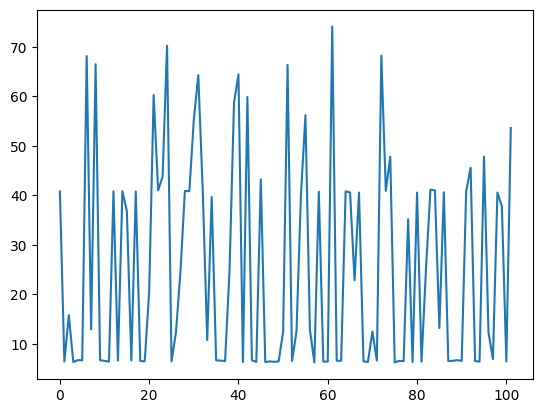

In [76]:
import matplotlib.pyplot as plt

plt.plot(data)